In [128]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

import statsmodels.api as sm

In [49]:
pd.options.display.float_format = '{:.6f}'.format

data = pd.read_csv('dataset_limpio.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
pd.set_option('display.max_columns', None)

## Pre-Training

Normalizo las variables

In [50]:
data_normalizar=data.drop(['price'],axis=1)
numericals = data_normalizar.columns

X = data_normalizar[numericals]

scaler = MinMaxScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i for i in numericals]
std_df

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,instant_bookable,host_days_active,cable,air_conditioning,outdoor,pool,parking,tv,internet,white_goods,gym,pet_friendly,dishes_silverware,essentials,grill,kitchen,long_term_stays_allowed,heating,elevator,refrigerator,freezer,phone_verification,email_verification,neighbourhood_cleansed_Agronomia,neighbourhood_cleansed_Almagro,neighbourhood_cleansed_Balvanera,neighbourhood_cleansed_Barracas,neighbourhood_cleansed_Belgrano,neighbourhood_cleansed_Boca,neighbourhood_cleansed_Boedo,neighbourhood_cleansed_Caballito,neighbourhood_cleansed_Chacarita,neighbourhood_cleansed_Coghlan,neighbourhood_cleansed_Colegiales,neighbourhood_cleansed_Constitucion,neighbourhood_cleansed_Flores,neighbourhood_cleansed_Floresta,neighbourhood_cleansed_Liniers,neighbourhood_cleansed_Mataderos,neighbourhood_cleansed_Monserrat,neighbourhood_cleansed_Monte Castro,neighbourhood_cleansed_Nueva Pompeya,neighbourhood_cleansed_Nuñez,neighbourhood_cleansed_Palermo,neighbourhood_cleansed_Parque Avellaneda,neighbourhood_cleansed_Parque Chacabuco,neighbourhood_cleansed_Parque Chas,neighbourhood_cleansed_Parque Patricios,neighbourhood_cleansed_Paternal,neighbourhood_cleansed_Puerto Madero,neighbourhood_cleansed_Recoleta,neighbourhood_cleansed_Retiro,neighbourhood_cleansed_Saavedra,neighbourhood_cleansed_San Cristobal,neighbourhood_cleansed_San Nicolas,neighbourhood_cleansed_San Telmo,neighbourhood_cleansed_Velez Sarsfield,neighbourhood_cleansed_Versalles,neighbourhood_cleansed_Villa Crespo,neighbourhood_cleansed_Villa Del Parque,neighbourhood_cleansed_Villa Devoto,neighbourhood_cleansed_Villa Gral. Mitre,neighbourhood_cleansed_Villa Lugano,neighbourhood_cleansed_Villa Luro,neighbourhood_cleansed_Villa Ortuzar,neighbourhood_cleansed_Villa Pueyrredon,neighbourhood_cleansed_Villa Real,neighbourhood_cleansed_Villa Riachuelo,neighbourhood_cleansed_Villa Santa Rita,neighbourhood_cleansed_Villa Soldati,neighbourhood_cleansed_Villa Urquiza,property_type_Apartment,property_type_Hotel,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroomtype_private,bathroomtype_shared
0,0.000000,1.000000,1.000000,0.066667,0.125000,0.000000,0.000000,0.045455,0.011240,0.000000,0.965356,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,1.000000,1.000000,1.000000,0.066667,0.125000,0.000000,0.000000,0.022727,0.007290,1.000000,0.844304,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,0.000000,1.000000,1.000000,0.066667,0.125000,0.000000,0.000000,0.136364,0.011240,0.000000,0.456287,0.0000

## Algoritmos

In [51]:
#Genero mi variable X
X=std_df

#Genero la variable y
y = data['price'].squeeze()

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10,shuffle=True)

### Linear Regression

In [52]:
#Entrenamos modelo LR
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

#Predecimos
lr_prediction = model_lr.predict(X_test)
lr_prediction_train = model_lr.predict(X_train)

In [53]:
intercept_lr = model_lr.intercept_
coeff_lr = model_lr.coef_
r2_test_lr = model_lr.score(X_test, y_test)
r2_train_lr = model_lr.score(X_train, y_train)
n = len(y_test)
p = np.count_nonzero(coeff_lr)
r2_adj_test_lr = 1-((1-r2_test_lr)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lr = 1-((1-r2_train_lr)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lr = mean_squared_error(y_test, lr_prediction)
mse_train_lr = mean_squared_error(y_train, lr_prediction_train)
mae_test_lr = mean_absolute_error(y_test, lr_prediction)
mae_train_lr = mean_absolute_error(y_train, lr_prediction_train)
rmse_test_lr = np.sqrt(mse_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

In [54]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lr=[mse_test_lr, mse_train_lr,
            mae_test_lr, mae_train_lr, 
            rmse_test_lr,rmse_train_lr,
            r2_test_lr,r2_train_lr,
            r2_adj_test_lr,r2_adj_train_lr
         ]

stats_dataframe_lr=pd.DataFrame({'LR':stats_lr},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
print(stats_dataframe_lr)


                          LR
MSE Test     29378005.448870
MSE Train    32602941.374815
MAE Test         3190.797013
MAE Train        3219.822525
RMSE Test        5420.148102
RMSE Train       5709.898543
R2 Test             0.365765
R2 Train            0.354198
R2 Adj Test         0.354641
R2 Adj Train        0.349391


In [55]:
print("Intercept:", intercept_lr)
print("Coeficientes:")
print(print(pd.Series(coeff_lr, index=X.columns)))

Intercept: 2.322857571496626e+16
Coeficientes:
host_is_superhost                       -16.028346
host_has_profile_pic                   -629.096787
host_identity_verified                 -843.473147
accommodates                          21105.801910
bathrooms                             19921.567755
                                    ...           
room_type_Hotel room      -3314721812024915.000000
room_type_Private room    -3314721812026732.000000
room_type_Shared room     -3314721812027470.500000
bathroomtype_private     -17867081535705166.000000
bathroomtype_shared      -17867081535707102.000000
Length: 90, dtype: float64
None


### OLS

In [56]:
#Entrenamos modelo OLS
X_train_sm = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_sm).fit()

#Predecimos
X_test_sm = sm.add_constant(X_test)
sm_prediction = model_ols.predict(X_test_sm)

X_train_sm = sm.add_constant(X_train)
sm_prediction_train = model_ols.predict(X_train_sm)

In [57]:
r2_test_ols = r2_score(y_test,sm_prediction)
r2_train_ols = r2_score(y_train,sm_prediction_train)
r2_adj_test_ols = sm.OLS(y_test, X_test_sm).fit().rsquared_adj
r2_adj_train_ols = model_ols.rsquared_adj
mse_test_ols = mean_squared_error(y_test, sm_prediction)
mse_train_ols = mean_squared_error(y_train, sm_prediction_train)
mae_test_ols = mean_absolute_error(y_test, sm_prediction)
mae_train_ols = mean_absolute_error(y_train, sm_prediction_train)
rmse_test_ols = np.sqrt(mse_test_ols)
rmse_train_ols = np.sqrt(mse_train_ols)

In [90]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ols=[mse_test_ols, mse_train_ols,
            mae_test_ols, mae_train_ols, 
            rmse_test_ols,rmse_train_ols,
            r2_test_ols,r2_train_ols,
            r2_adj_test_ols,r2_adj_train_ols
         ]

stats_dataframe_ols=pd.DataFrame({'OLS':stats_ols},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
print(stats_dataframe_ols)

                         OLS
MSE Test     29388548.758964
MSE Train    32602605.216348
MAE Test         3200.176130
MAE Train        3228.580621
RMSE Test        5421.120618
RMSE Train       5709.869107
R2 Test             0.365538
R2 Train            0.354205
R2 Adj Test         0.376881
R2 Adj Train        0.349613


In [91]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     77.14
Date:                Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:23:31   Log-Likelihood:            -1.2266e+05
No. Observations:               12182   AIC:                         2.455e+05
Df Residuals:                   12095   BIC:                         2.461e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Lasso

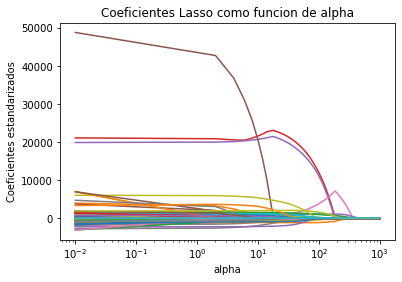

In [124]:
#Análisis previo de los alpha
alphas_lasso = np.linspace(0.01,1000,500)
lasso = linear_model.Lasso(max_iter = 10000, normalize = False)
coefs = []

for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Lasso como funcion de alpha');

In [125]:
#Creamos el modelo
lassocv = linear_model.LassoCV(alphas=None,normalize=False,cv=10,random_state=10, max_iter=10000)

#Lo entrenamos
model_lasso = lassocv.fit(X_train, y_train)

#Lo probamos
lasso_prediction = model_lasso.predict(X_test)
lasso_prediction_train = model_lasso.predict(X_train)

In [126]:
alpha_lasso = model_lasso.alpha_
coeff_lasso = model_lasso.coef_
intercept_lasso = model_lasso.intercept_
r2_test_lasso = model_lasso.score(X_test, y_test)
r2_train_lasso = model_lasso.score(X_train, y_train)
p = np.count_nonzero(coeff_lasso)
r2_adj_test_lasso = 1-((1-r2_test_lasso)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lasso = 1-((1-r2_train_lasso)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lasso = mean_squared_error(y_test, lasso_prediction)
mse_train_lasso = mean_squared_error(y_train, lasso_prediction_train)
mae_test_lasso = mean_absolute_error(y_test, lasso_prediction)
mae_train_lasso = mean_absolute_error(y_train, lasso_prediction_train)
rmse_test_lasso = np.sqrt(mse_test_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)

In [127]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lasso = [mse_test_lasso, mse_train_lasso,
                mae_test_lasso, mae_train_lasso, 
                rmse_test_lasso,rmse_train_lasso,
                r2_test_lasso,r2_train_lasso,
                r2_adj_test_lasso,r2_adj_train_lasso
                ]

stats_dataframe_lasso =pd.DataFrame({'Lasso':stats_lasso},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lasso

,Lasso
MSE Test,29353618.800787
MSE Train,32699908.173685
MAE Test,3173.076543
MAE Train,3210.854253
RMSE Test,5417.898006
RMSE Train,5718.383353
R2 Test,0.366292
R2 Train,0.352277
R2 Adj Test,0.358303
R2 Adj Train,0.348803


### Ridge

In [102]:
alphas_ridge = np.logspace(-10, 10, 400)

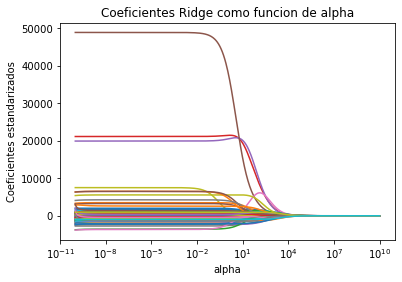

In [105]:
#Análisis previo de los alpha
alphas_ridge = np.logspace(-10, 10, 500)
ridge = linear_model.Ridge(max_iter=10000)
coefs = []

for a in alphas_ridge:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas_ridge, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Ridge como funcion de alpha');

In [106]:
#Creamos el modelo
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge,normalize=False,cv=10)

#Lo entrenamos
model_ridge = ridgecv.fit(X_train, y_train)

#Lo probamos
ridge_prediction = model_ridge.predict(X_test)
ridge_prediction_train = model_ridge.predict(X_train)


In [107]:
alpha_ridge = model_ridge.alpha_
coeff_ridge = model_ridge.coef_
intercept_ridge = model_ridge.intercept_
r2_test_ridge = model_ridge.score(X_test, y_test)
r2_train_ridge = model_ridge.score(X_train, y_train)
p = np.count_nonzero(coeff_ridge)
r2_adj_test_ridge = 1-((1-r2_test_ridge)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_ridge = 1-((1-r2_train_ridge)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_ridge = mean_squared_error(y_test, ridge_prediction)
mse_train_ridge = mean_squared_error(y_train, ridge_prediction_train)
mae_test_ridge = mean_absolute_error(y_test, ridge_prediction)
mae_train_ridge = mean_absolute_error(y_train, ridge_prediction_train)
rmse_test_ridge = np.sqrt(mse_test_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

In [108]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ridge = [mse_test_ridge, mse_train_ridge,
                mae_test_ridge, mae_train_ridge, 
                rmse_test_ridge,rmse_train_ridge,
                r2_test_ridge,r2_train_ridge,
                r2_adj_test_ridge,r2_adj_train_ridge
                ]

stats_dataframe_ridge =pd.DataFrame({'Ridge':stats_ridge},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_ridge

,Ridge
MSE Test,29413864.553945
MSE Train,32635986.337592
MAE Test,3190.221591
MAE Train,3221.028753
RMSE Test,5423.455038
RMSE Train,5712.791466
R2 Test,0.364991
R2 Train,0.353544
R2 Adj Test,0.353853
R2 Adj Train,0.348732


### ElasticNet

In [129]:
model_en = ElasticNet(random_state = 0)

In [130]:
model_en.fit(X_train, y_train)

ElasticNet(random_state=0)

In [131]:
elasticnet_prediction = model_en.predict(X_test)
elasticnet_prediction_train = model_en.predict(X_train)

In [133]:
coeff_en = model_en.coef_
intercept_en = model_en.intercept_
r2_test_en = model_en.score(X_test, y_test)
r2_train_en = model_en.score(X_train, y_train)
p = np.count_nonzero(coeff_en)
r2_adj_test_en = 1-((1-r2_test_en)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_en = 1-((1-r2_train_en)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_en = mean_squared_error(y_test, elasticnet_prediction)
mse_train_en = mean_squared_error(y_train, elasticnet_prediction_train)
mae_test_en = mean_absolute_error(y_test, elasticnet_prediction)
mae_train_en = mean_absolute_error(y_train, elasticnet_prediction_train)
rmse_test_en = np.sqrt(mse_test_en)
rmse_train_en = np.sqrt(mse_train_en)

In [134]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_en = [mse_test_en, mse_train_en,
                mae_test_en, mae_train_en, 
                rmse_test_en,rmse_train_en,
                r2_test_en,r2_train_en,
                r2_adj_test_en,r2_adj_train_en
                ]

stats_dataframe_en =pd.DataFrame({'ElasticNet':stats_en},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_en

,ElasticNet
MSE Test,42948558.979906
MSE Train,46824509.338663
MAE Test,3908.266539
MAE Train,3981.970759
RMSE Test,6553.515010
RMSE Train,6842.843659
R2 Test,0.072794
R2 Train,0.072496
R2 Adj Test,0.057082
R2 Adj Train,0.065824


## Comparacion de modelos

In [135]:
# Valores estadísticos
pd.concat([stats_dataframe_lr,stats_dataframe_ols,stats_dataframe_lasso,stats_dataframe_ridge, stats_dataframe_en],axis=1)

,LR,OLS,Lasso,Ridge,ElasticNet
MSE Test,29378005.448870,29388548.758964,29353618.800787,29413864.553945,42948558.979906
MSE Train,32602941.374815,32602605.216348,32699908.173685,32635986.337592,46824509.338663
MAE Test,3190.797013,3200.176130,3173.076543,3190.221591,3908.266539
MAE Train,3219.822525,3228.580621,3210.854253,3221.028753,3981.970759
RMSE Test,5420.148102,5421.120618,5417.898006,5423.455038,6553.515010
RMSE Train,5709.898543,5709.869107,5718.383353,5712.791466,6842.843659
R2 Test,0.365765,0.365538,0.366292,0.364991,0.072794
R2 Train,0.354198,0.354205,0.352277,0.353544,0.072496
R2 Adj Test,0.354641,0.376881,0.358303,0.353853,0.057082
R2 Adj Train,0.349391,0.349613,0.348803,0.348732,0.065824


Lasso es quien tiene menos MSE Test, MAE Test y RMSE Test. Sin embargo, si evaluamos mediante R2 Adj Test, el mejor modelo es OLS

In [136]:
#Cross Validation entre Lineal, Lasso, Ridge y OLS
cv_scores_mean = []

model1=model_lr
model2=model_lasso
model3=model_ridge
model4=model_en
#model5=model_ols

modelos=[model1, model2, model3, model4]

for modelo in modelos:
    cv_score = cross_val_score(modelo, X_train, y_train, cv=5)
    cv_scores_mean.append(cv_score.mean())


pd.DataFrame({'CV':cv_scores_mean},index=["Linear Regression", "Lasso", "Ridge", "EN"])

,CV
Linear Regression,0.335575
Lasso,0.338429
Ridge,0.336105
EN,0.071304


## Graficos del mejor modelo

Tomando a OLS como el mejor modelo

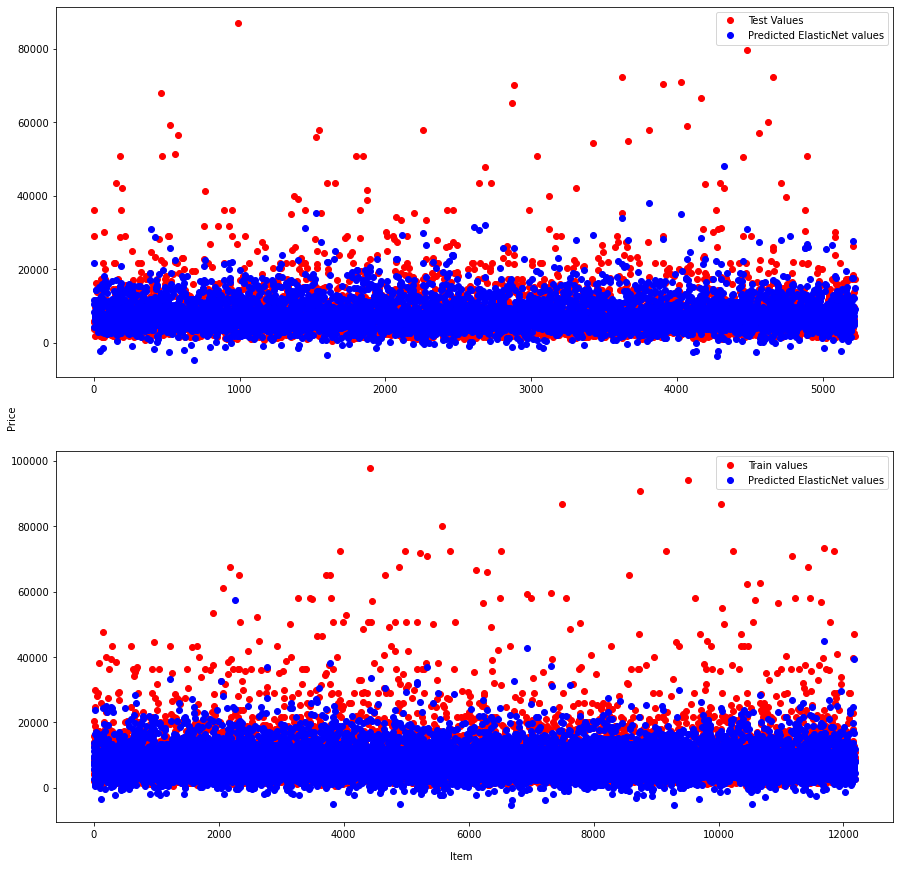

In [138]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted ElasticNet values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted ElasticNet values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price', va='center', rotation='vertical')
plt.show()

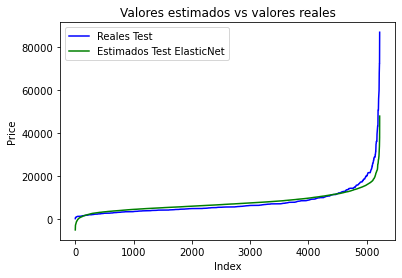

In [139]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(sm_prediction), color='green', label='Estimados Test ElasticNet')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

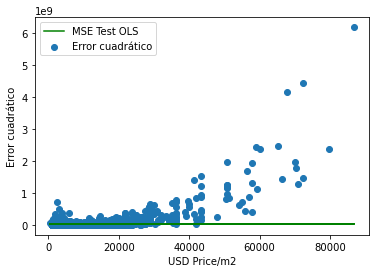

In [62]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ols=pow(y_test - sm_prediction,2)
plt.scatter(y_test,err_cuad_test_ols, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ols,len(err_cuad_test_ols)), label='MSE Test OLS', color='green')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Error cuadrático')
plt.show()

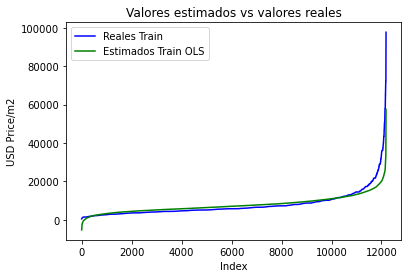

In [63]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(sm_prediction_train), color='green', label='Estimados Train OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

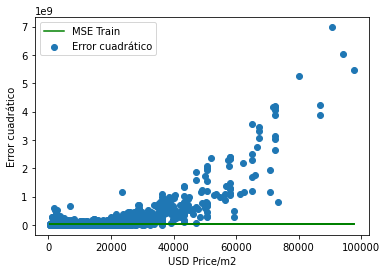

In [64]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ols=pow(y_train - sm_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ols, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ols,len(err_cuad_train_ols)), label='MSE Train', color='green')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

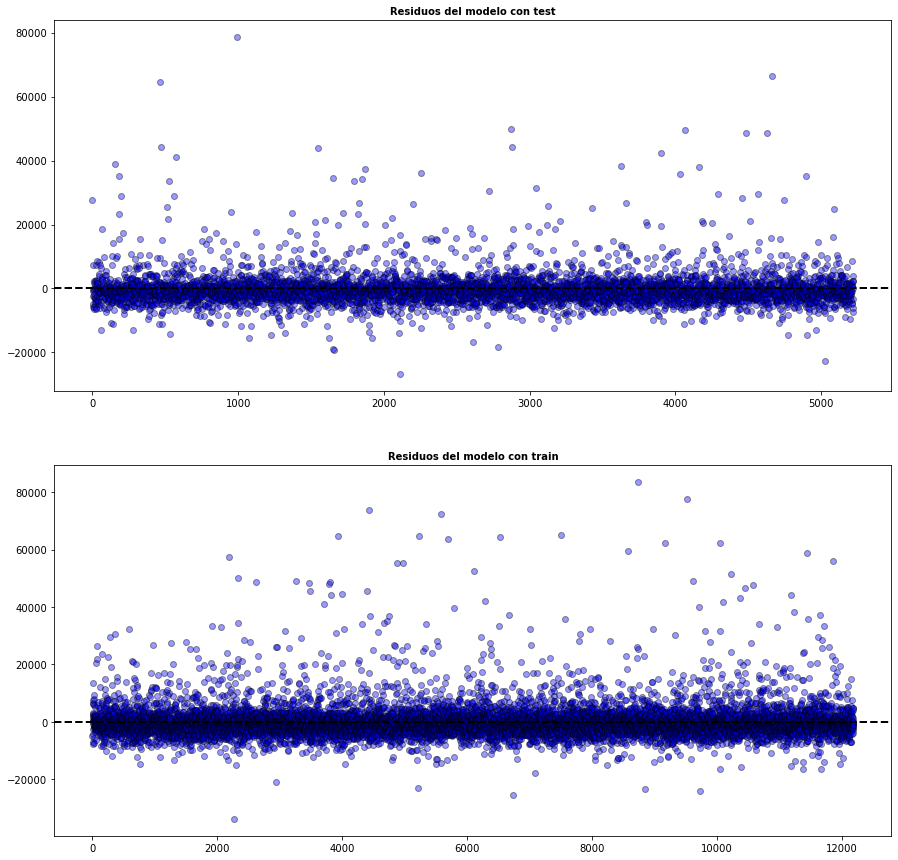

In [88]:
#Gráfico de los residuos/errores
model_residuals_test_ols = y_test - sm_prediction
model_residuals_train_ols = y_train - sm_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

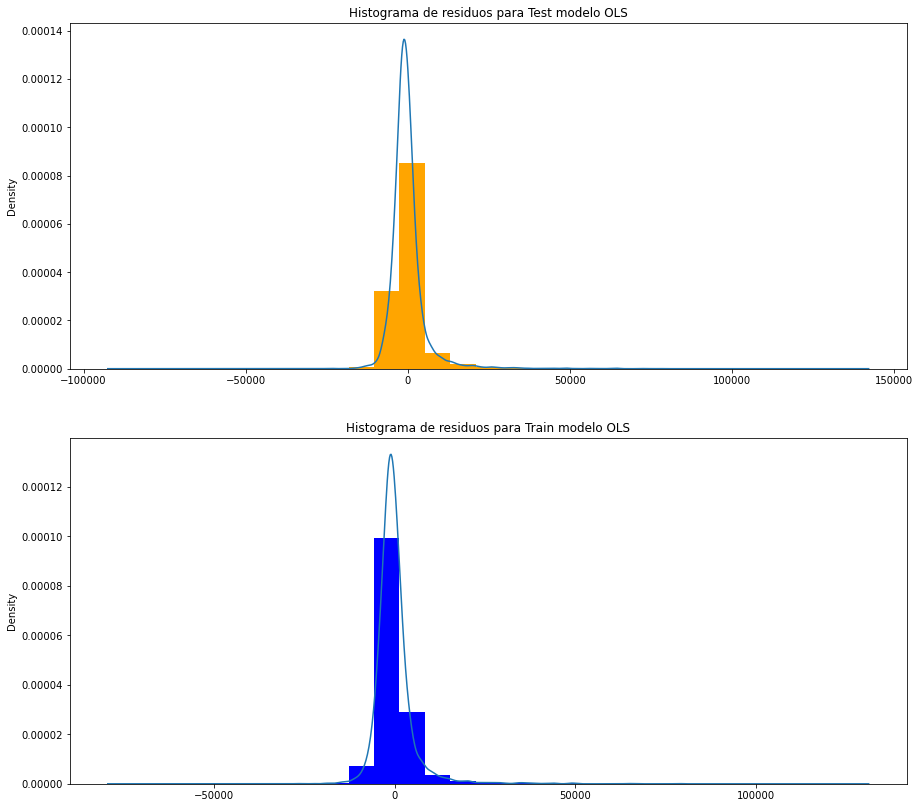

In [89]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ols.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ols.plot(kind = "kde",ax=ax2);
model_residuals_train_ols.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ols.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo OLS");
ax2.set_title("Histograma de residuos para Train modelo OLS");